In [1]:
"CSCI" + " 0451"

'CSCI 0451'

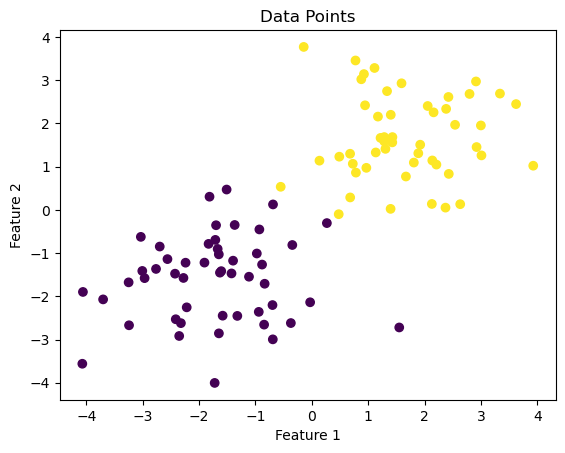

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
title = plt.gca().set(title = "Data Points")

In [2]:
from perceptron import Perceptron

# fit()

Perceptron.fit(X, y) is my primary method. When p.fit(X, y) is called, p should have an instance variable of weights called w. This w is the vector in the classifier above. Additionally, p should have an instance variable called p.history which is a list of the evolution of the score over the training period. 

In [ ]:

def fit(self, X, y, max_steps=1000):
    #preprocess X by padding with 1s
    X_hat = np.append(X, np.ones((X.shape[0], 1)), 1)
       
     #make -1 or +1 
    y_hat = y*2-1
    
    #initialize random w vector
    self.w_hat = np.random.rand(X_hat.shape[1]) 
    self.history = []
        
    for _ in range(max_steps):
    
        i = np.random.randint(0, X.shape[0])
            
        #update
        self.w_hat = (
            self.w_hat 
            + ((y_hat[i]*np.dot(self.w_hat, X_hat[i]) <0)*1)
            * y_hat[i]
            * X_hat[i]
        )
            
        loss = 1 - self.score(X, y)
        self.history.append(loss)
            
        if loss == 0:
            break

# predict()

Perceptron.predict(X) returns a vector of predicted labels on the data. 

In [ ]:
def predict(self, X):
     #preprocess X by padding with 1s
    X_hat = np.append(X, np.ones((X.shape[0], 1)), 1)
        
    prediction_vector = X_hat @ self.w_hat
        
    prediction_vector = prediction_vector > 0 #true false
        
    prediction_vector = prediction_vector * 1 #1 0
        
    return prediction_vector

# score()

Perceptron.score(X, y) returns the accuracy of the perceptron as a number between 0 and 1, with 1 corresponding to perfect classification.

In [ ]:
def score(self, X, y):
    #preprocess X by padding with 1s
    X_hat = np.append(X, np.ones((X.shape[0], 1)), 1)
        
    predictions = self.predict(X)
        
    accuracy = predictions == y 
        
    accuracy = accuracy * 1
        
    accuracy = accuracy.mean()
        
    return accuracy

# history graph

In [3]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Loss")

NameError: name 'p' is not defined

# drawLine()

NameError: name 'p' is not defined

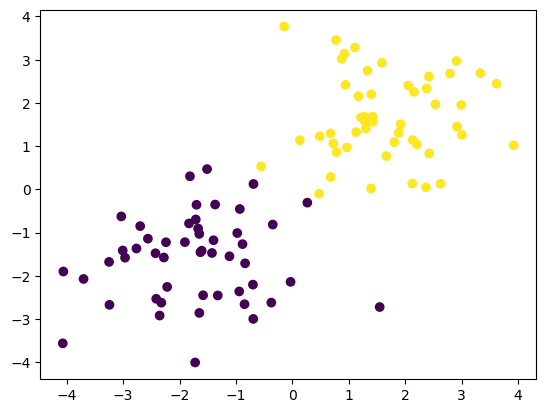

In [4]:
def draw_line(w, x_min, x_max):
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w_hat, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
